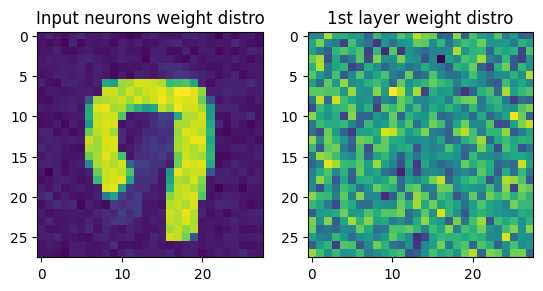

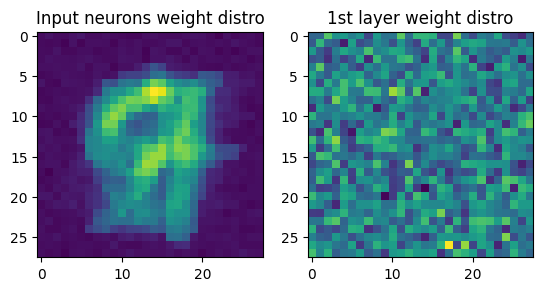

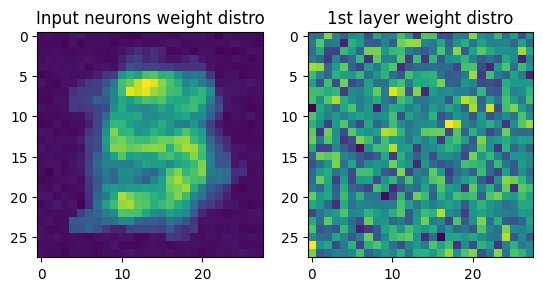

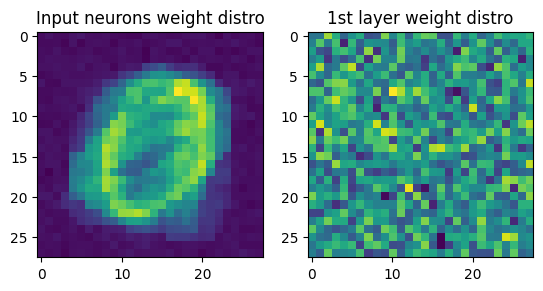

In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt

show_first_layer_weights('./weightsStep0Epoch0')
show_first_layer_weights('./weightsStep100Epoch0')
show_first_layer_weights('./weightsStep400Epoch0')
show_first_layer_weights('./weightsStep500Epoch0')
plt.show()

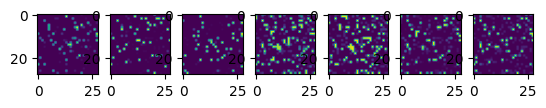

In [11]:
_, axs = plt.subplots(1,7)
axs[0].imshow(show_activation("spikesStep0Epoch0"))
axs[1].imshow(show_activation("spikesStep100Epoch0"))
axs[2].imshow(show_activation("spikesStep200Epoch0"))
axs[3].imshow(show_activation("spikesStep300Epoch0"))
axs[4].imshow(show_activation("spikesStep400Epoch0"))
axs[5].imshow(show_activation("spikesStep500Epoch0"))
axs[6].imshow(show_activation("spikesStep600Epoch0"))
plt.show()

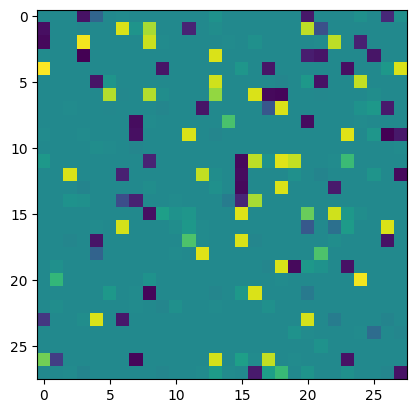

In [9]:
x = np.subtract(show_activation("spikesStep400Epoch0"),show_activation("spikesStep300Epoch0"))
plt.imshow(x)

## Likewise, the spiking turns out to be very uniformly distributed after application of STDP
### Though it is unclear whether this is due to the amount of neurons used

In [3]:
def show_first_layer_weights(saved_weights_file):
    weights = []
    with open(f'{saved_weights_file}.csv','r') as csvfile:
        plots = csv.reader(csvfile, delimiter = ',')
        for row in plots:
            weights.append(row)

    neurons = np.zeros(len(weights[0]))
    
    _, axs = plt.subplots(1, 2)
    for img_neuron in weights:
        for iii, connection in enumerate(img_neuron):
            neurons[iii] = neurons[iii]+float(connection)
    neurons = neurons.reshape(28,28)
    axs[1].imshow(neurons)
    axs[1].set_title("1st layer weight distro")

    neurons = np.zeros(len(weights))
    for iii, img_neuron in enumerate(weights):
        for weight in img_neuron:
            neurons[iii] = neurons[iii]+float(weight)
    neurons = neurons.reshape(28,28)
    axs[0].imshow(neurons)
    axs[0].set_title("Input neurons weight distro")
    return axs

def show_activation(array_like):
    spikes = []
    with open(f'{array_like}.csv','r') as csvfile:
        plots = csv.reader(csvfile, delimiter = ',')
        for iii, row in enumerate(plots):
            spikes.append([])
            for element in row:
                spikes[iii].append(float(element))
    return spikes